**This notebook creates a machine learning model for the Titanic Dataset from Kaggle. Within the Titanic dataset there are a series of features(x) and the outcome of whether a passenger survied or not (y). A Logistic regression alogorithm, using supervised learning will be implemted and evaluated. We will then use the model to predict values for 'new' data with unkown outcomes. **



1. Import Libraies



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

2. Importing dataset from Kaggle, having downloaded the train.csv from the website.

> Add blockquote



In [ ]:
uploaded = files.upload()

Saving train (2).csv to train (2) (1).csv


In [ ]:
train_dataset = pd.read_csv(io.BytesIO(uploaded['train (2) (1).csv']))

3. Exploratory Data Analysis

In [ ]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_dataset.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


4. Data Scrubbing - Part 1 filling in the NaN/missing values

In [ ]:
train_dataset['Embarked'].mode()[0]

'S'

In [ ]:
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0], inplace=True)
train_dataset.isna().sum()

<ipython-input-11-f864c6c56c79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Delete what should be deleted
del train_dataset['Ticket']
del train_dataset['Cabin']
del train_dataset['Name']
del train_dataset['PassengerId']

In [ ]:
train_dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train_dataset.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Understand Age
print(train_dataset['Age'].max())
print(train_dataset['Age'].min())
print(train_dataset['Age'].max() - train_dataset['Age'].min())

80.0
0.42
79.58


In [ ]:
#Check if age is affected by sex
train_dataset.groupby('Sex', as_index=False)['Age'].median()

,Sex,Age
0,female,27.0
1,male,29.0


In [ ]:
#Check if age is affected by Pclass
train_dataset.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [ ]:
#Filling the NaN values in the age coloum with the median value of the age per class

train_dataset.loc[(train_dataset.Age.isna()) & ((train_dataset.Pclass == 1)), "Age"] = 37.0
train_dataset.loc[(train_dataset.Age.isna()) & ((train_dataset.Pclass == 2)), "Age"] = 29.0
train_dataset.loc[(train_dataset.Age.isna()) & ((train_dataset.Pclass == 3)), "Age"] = 24.0

In [ ]:
train_dataset.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Going back to Explorotory Data Analysis now that there are no more missing values. Visualising the data with graphs.

In [ ]:
male = train_dataset[train_dataset.Sex == 'male']
female = train_dataset[train_dataset.Sex == 'female']


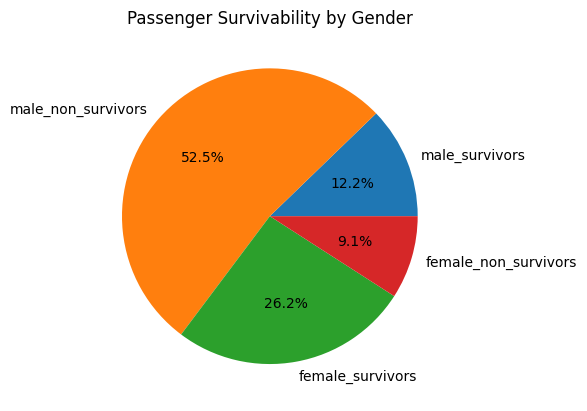

In [ ]:
# Creating a pie chart of female percentage of survivng and male percentage of surviving

# Calculations of percentages for each 'shape' gives us the count
male_survivors = male[male.Survived == 1].shape[0]/train_dataset.shape[0]
male_non_survivors = male[male.Survived == 0].shape[0]/train_dataset.shape[0]
female_survivors = female[female.Survived == 1].shape[0]/train_dataset.shape[0]
female_non_survivors = female[female.Survived == 0].shape[0]/train_dataset.shape[0]

# Drawing the pie chart from our calculations
labels = 'male_survivors', 'male_non_survivors', 'female_survivors', 'female_non_survivors'
sizes = [male_survivors, male_non_survivors, female_survivors, female_non_survivors]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Passenger Survivability by Gender")
plt.show()


In [ ]:
# Filtering based on class and whether they survived or not

class1 = train_dataset[train_dataset.Pclass == 1]
class2 = train_dataset[train_dataset.Pclass == 2]
class3 = train_dataset[train_dataset.Pclass == 3]
class1_survivors = class1[class1.Survived == 1]
class2_survivors = class2[class2.Survived == 1]
class3_survivors = class3[class3.Survived == 1]

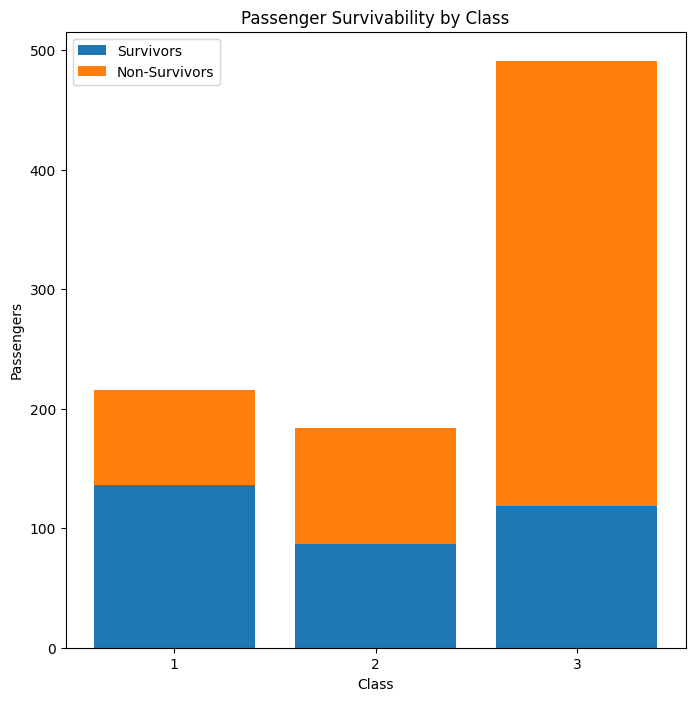

In [ ]:
# Drawing a bar chart of passenager class and survival

labels = ['1', '2', '3']
survivors = [class1_survivors.shape[0], class2_survivors.shape[0], class3_survivors.shape[0]]
non_survivors = [class1.shape[0]- survivors[0], class2.shape[0]-survivors[1], class3.shape[0]-survivors[2]]

# create the bar graph
fig, ax = plt.subplots(figsize=(8,8))

ax.bar(labels, survivors, label='Survivors')
ax.bar(labels, non_survivors, bottom=survivors, label='Non-Survivors')

ax.set_ylabel('Passengers')
ax.set_xlabel('Class')
ax.set_title('Passenger Survivability by Class')
ax.legend()

plt.show()

Data Scrubbing - Part 2 'Encoding'

In [ ]:
#Creating new One-hot encoded columns
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']

In [ ]:
for col in cols:
	dummies.append(pd.get_dummies(train_dataset[col]))

all_dummies = pd.concat(dummies, axis=1)
all_dummies

,1,2,3,female,male,C,Q,S
0,False,False,True,False,True,False,False,True
1,True,False,False,True,False,True,False,False
2,False,False,True,True,False,False,False,True
3,True,False,False,True,False,False,False,True
4,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...
886,False,True,False,False,True,False,False,True
887,True,False,False,True,False,False,False,True
888,False,False,True,True,False,False,False,True
889,True,False,False,False,True,True,False,False


In [ ]:
# Add dummies to df and remove the old columns
train_dataset = pd.concat((train_dataset,all_dummies), axis=1)
train_dataset = train_dataset.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
train_dataset.head(5)

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


Data Scrubbing - Part 3 Labelling our data/Supervised learning.

In [ ]:
#separate features from the targets, supervised learning
X = train_dataset.loc[:, train_dataset.columns != 'Survived'].values
y = train_dataset['Survived'].values

In [ ]:
X

array([[22.0, 1, 0, ..., False, False, True],
       [38.0, 1, 0, ..., True, False, False],
       [26.0, 0, 0, ..., False, False, True],
       ...,
       [24.0, 1, 2, ..., False, False, True],
       [26.0, 0, 0, ..., True, False, False],
       [32.0, 0, 0, ..., False, True, False]], dtype=object)

In [ ]:
X[0]

array([22.0, 1, 0, 7.25, False, False, True, False, True, False, False,
       True], dtype=object)

In [ ]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Data Scrubbing - Part 4 'Feature Scaling'

In [ ]:
#Scaling the age and fare features
from sklearn import preprocessing
X[:, 0] = preprocessing.scale(X[:,0])
X[:, 3] = preprocessing.scale(X[:, 3])

In [ ]:
X[0]

array([-0.533833690156903, 1, 0, -0.5024451714361923, False, False, True,
       False, True, False, False, True], dtype=object)

In [ ]:
len(X)

891

*5*. Split Validation

In [ ]:
# 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

712

In [ ]:
len(X_test)

179

6. Implement Algorithm

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_test, y_test) * 100, 2)
acc_log

80.45

In [ ]:
# outputting the correlation of our model/patterns it found
coeff_df = pd.DataFrame(train_dataset.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,female,1.317583
4,1,0.790498
5,2,0.231604
9,C,0.218827
3,Fare,0.168830
10,Q,0.017395
2,Parch,-0.128336
11,S,-0.238331
1,SibSp,-0.298752
0,Age,-0.403231


7. Evaluate the model

In [ ]:
Y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(Y_pred, y_test)

0.8044692737430168

In [ ]:
confusion_matrix(Y_pred, y_test)

array([[91, 21],
       [14, 53]])



8. Use the model on new data with unknown output, we know the result will only be 80% accurate.

In [ ]:
uploaded = files.upload()

Saving test (2).csv to test (2).csv


In [ ]:
new_dataset = pd.read_csv(io.BytesIO(uploaded['test (2).csv']))


Cleaning the data for the new dataset to be able to feed into our model.

In [ ]:
new_dataset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Delete what should be deleted
del new_dataset['Ticket']
del new_dataset['Cabin']
del new_dataset['Name']
del new_dataset['PassengerId']

In [ ]:
new_dataset.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
new_dataset.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
new_dataset['Fare'].fillna(new_dataset['Fare'].mode()[0], inplace=True)
new_dataset.isna().sum()

<ipython-input-53-70f7b363f873>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset['Fare'].fillna(new_dataset['Fare'].mode()[0], inplace=True)


,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#Check if age is affected by sex
new_dataset.groupby('Sex', as_index=False)['Age'].median()

,Sex,Age
0,female,27.0
1,male,27.0


In [ ]:
#Check if age is affected by Pclass
new_dataset.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,42.0
1,2,26.5
2,3,24.0


In [ ]:
#Filling the NaN values in the age coloum with the median value of the age per class

new_dataset.loc[(new_dataset.Age.isna()) & ((new_dataset.Pclass == 1)), "Age"] = 42.0
new_dataset.loc[(new_dataset.Age.isna()) & ((new_dataset.Pclass == 2)), "Age"] = 26.5
new_dataset.loc[(new_dataset.Age.isna()) & ((new_dataset.Pclass == 3)), "Age"] = 24.0

In [ ]:
new_dataset.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#Creating new One-hot encoded columns
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']

In [ ]:
for col in cols:
	dummies.append(pd.get_dummies(new_dataset[col]))

all_dummies = pd.concat(dummies, axis=1)
all_dummies

,1,2,3,female,male,C,Q,S
0,False,False,True,False,True,False,True,False
1,False,False,True,True,False,False,False,True
2,False,True,False,False,True,False,True,False
3,False,False,True,False,True,False,False,True
4,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...
413,False,False,True,False,True,False,False,True
414,True,False,False,True,False,True,False,False
415,False,False,True,False,True,False,False,True
416,False,False,True,False,True,False,False,True


In [ ]:
# Add dummies to df and remove the old columns
new_dataset = pd.concat((new_dataset,all_dummies), axis=1)
new_dataset = new_dataset.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
new_dataset.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,34.5,0,0,7.8292,False,False,True,False,True,False,True,False
1,47.0,1,0,7.0000,False,False,True,True,False,False,False,True
2,62.0,0,0,9.6875,False,True,False,False,True,False,True,False
3,27.0,0,0,8.6625,False,False,True,False,True,False,False,True
4,22.0,1,1,12.2875,False,False,True,True,False,False,False,True


In [ ]:
#separate features from the targets, supervised learning
X_new = new_dataset.values

In [ ]:
X_new

array([[34.5, 0, 0, ..., False, True, False],
       [47.0, 1, 0, ..., False, False, True],
       [62.0, 0, 0, ..., False, True, False],
       ...,
       [38.5, 0, 0, ..., False, False, True],
       [24.0, 0, 0, ..., False, False, True],
       [24.0, 1, 1, ..., True, False, False]], dtype=object)

In [ ]:
#Scaling the age and fare features
from sklearn import preprocessing
X_new[:, 0] = preprocessing.scale(X_new[:,0])
X_new[:, 3] = preprocessing.scale(X_new[:, 3])

Use the model on the new X values, to produce wheather they survied or not.

In [ ]:
Y_new_prediction = model.predict(X_new)

In [ ]:
Y_new_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Specifying Column Names
new_dataset = pd.DataFrame(X_new, columns=['Age','SibSp','Parch','Fare','1','2','3','female','male', 'C', 'Q', 'S'])

# Display the DataFrame
new_dataset.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0.393048,0,0,-0.497063,False,False,True,False,True,False,True,False
1,1.356309,1,0,-0.511926,False,False,True,True,False,False,False,True
2,2.512223,0,0,-0.463754,False,True,False,False,True,False,True,False
3,-0.184909,0,0,-0.482127,False,False,True,False,True,False,False,True
4,-0.570214,1,1,-0.417151,False,False,True,True,False,False,False,True


In [ ]:
# add 'Survived' array as new column in DataFrame
new_dataset['Survived'] = Y_new_prediction.tolist()

In [ ]:
new_dataset.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Survived
0,0.393048,0,0,-0.497063,False,False,True,False,True,False,True,False,0
1,1.356309,1,0,-0.511926,False,False,True,True,False,False,False,True,0
2,2.512223,0,0,-0.463754,False,True,False,False,True,False,True,False,0
3,-0.184909,0,0,-0.482127,False,False,True,False,True,False,False,True,0
4,-0.570214,1,1,-0.417151,False,False,True,True,False,False,False,True,1


In [ ]:
male = new_dataset[new_dataset.male == True ]
female = new_dataset[new_dataset.female == True]

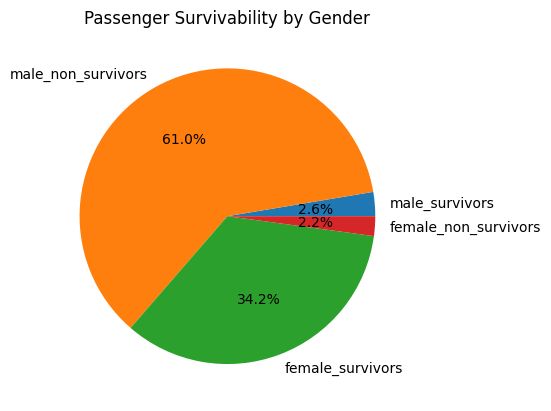

In [ ]:
# Creating a pie chart of female percentage of survivng and male percentage of surviving

# Calculations of percentages for each 'shape' gives us the count
male_survivors = male[male.Survived == 1].shape[0]/new_dataset.shape[0]
male_non_survivors = male[male.Survived == 0].shape[0]/new_dataset.shape[0]
female_survivors = female[female.Survived == 1].shape[0]/new_dataset.shape[0]
female_non_survivors = female[female.Survived == 0].shape[0]/new_dataset.shape[0]

# Drawing the pie chart from our calculations
labels = 'male_survivors', 'male_non_survivors', 'female_survivors', 'female_non_survivors'
sizes = [male_survivors, male_non_survivors, female_survivors, female_non_survivors]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Passenger Survivability by Gender")
plt.show()